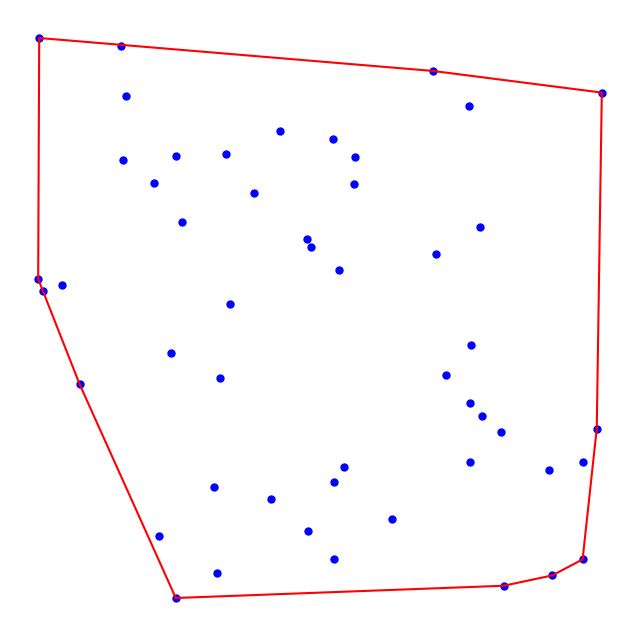

In [14]:
import random
import math
import matplotlib.pyplot as plt

class Point2D:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def genererPointAleatoire(self, borneX, borneY):
        # Génère un point aléatoire dans les bornes spécifiées
        self.x = random.randint(0, borneX)
        self.y = random.randint(0, borneY)

    def distanceEuclidienne(self, p):
        # Calcule la distance euclidienne entre ce point et un autre point p
        return math.sqrt((self.x - p.x) ** 2 + (self.y - p.y) ** 2)

    def __lt__(self, other):
        # Surcharge de l'opérateur <, basée sur les coordonnées y et x en cas d'égalité
        if self.y == other.y:
            return self.x < other.x
        return self.y < other.y

    def __gt__(self, other):
        # Surcharge de l'opérateur >, basée sur les coordonnées y et x en cas d'égalité
        if self.y == other.y:
            return self.x > other.x
        return self.y > other.y

    def __repr__(self):
        # Méthode spéciale pour afficher le point
        return f"({self.x}, {self.y})"

class Vector:
    def __init__(self, p0, p1):
        self.p0 = p0
        self.p1 = p1

    def calculPente(self):
        # Calcule la pente du vecteur
        return (self.p1.y - self.p0.y) / (self.p1.x - self.p0.x)

    def puissance(self, m):
        # Calcule la puissance du point m par rapport à ce vecteur
        return ((self.p1.y - self.p0.y) * (m.x - self.p1.x) - (self.p1.x - self.p0.x) * (m.y - self.p1.y)) ** 2

    def determinant(self, v):
        # Calcule le déterminant entre ce vecteur et un autre vecteur v
        return (self.p1.x - self.p0.x) * (v.p1.y - v.p0.y) - (self.p1.y - self.p0.y) * (v.p1.x - v.p0.x)

    def __lt__(self, other):
        # Surcharge de l'opérateur <, basée sur la pente
        return self.calculPente() < other.calculPente()

class NuagePoints:
    def __init__(self):
        self.points = []

    def genereNuagePointAlea(self, nbPoints, borneX, borneY):
        # Génère un nuage de points aléatoires
        self.points = [Point2D(random.randint(0, borneX), random.randint(0, borneY)) for _ in range(nbPoints)]

    def copieNuagePoints(self):
        # Copie le nuage de points actuel dans un nouveau nuage
        copie = NuagePoints()
        copie.points = [Point2D(p.x, p.y) for p in self.points]
        return copie

    def ajoutePoint(self, p):
        # Ajoute un point au nuage de points
        self.points.append(p)

    def retirePoint(self, p):
        # Retire un point du nuage de points s'il existe
        self.points.remove(p)

    def trierNuagePoints(self):
        # Trie le nuage de points selon les coordonnées y puis les coordonnées x en cas d'égalité
        self.points.sort()

    def afficheCoordonnees(self):
        # Affiche les coordonnées de tous les points du nuage
        for p in self.points:
            print(p)

    def affichageGraphique(self):
        # Affiche un graphique avec les points du nuage
        plt.scatter([p.x for p in self.points], [p.y for p in self.points])
        plt.show()

class Polygone:
    def __init__(self):
        self.contour = NuagePoints()

    def triPolaire(self):
        # Trouver le point le plus bas du polygone
        lowest_point = min(self.contour.points, key=lambda p: (p.y, p.x))

        # Trier les points selon leur angle polaire par rapport au point le plus bas
        self.contour.points.sort(key=lambda p: (math.atan2(p.y - lowest_point.y, p.x
        - lowest_point.x), lowest_point.distanceEuclidienne(p)))

    def printGraphique(self):
        # Affiche le polygone en reliant ses points par des segments
        plt.plot([p.x for p in self.contour.points], [p.y for p in self.contour.points], '-o')
        plt.show()

def enveloppeConvexe(points):
    if len(points) < 3:
        print("Au moins 3 points sont nécessaires pour le calcul de l'enveloppe convexe.")
        return []

    # Trouver le point le plus bas
    lowest = min(points)

    # Trier les points en fonction de leur angle polaire par rapport au point le plus bas
    points.sort(key=lambda p: (math.atan2(p.y - lowest.y, p.x - lowest.x), p.distanceEuclidienne(lowest)))

    # Initialiser l'enveloppe convexe avec les deux premiers points triés
    enveloppeConvexe = [points[0], points[1]]

    # Parcourir les points restants et les ajouter à l'enveloppe convexe
    for i in range(2, len(points)):
        while len(enveloppeConvexe) > 1 and Vector(enveloppeConvexe[-2], enveloppeConvexe[-1]).determinant(Vector(enveloppeConvexe[-1], points[i])) <= 0:
            enveloppeConvexe.pop()
        enveloppeConvexe.append(points[i])

    return enveloppeConvexe

if __name__ == '__main__':
    # Génération de points aléatoires
    nuage = NuagePoints()
    nuage.genereNuagePointAlea(50, 600, 600)
    points = nuage.points

    # Calcul de l'enveloppe convexe en utilisant l'algorithme de Graham
    enveloppe = enveloppeConvexe(points)

    # Dessin de l'enveloppe convexe et des points
    plt.figure(figsize=(8, 8))
    plt.plot([p.x for p in points], [p.y for p in points], 'bo', markersize=5)  # Points
    enveloppe.append(enveloppe[0])  # Fermer le polygone
    plt.plot([p.x for p in enveloppe], [p.y for p in enveloppe], 'r-')  # Enveloppe convexe
    plt.axis('off')  # Masquer les axes
    plt.show()
